# Importing Libraries

In [2]:
# Pandas for data manipulation and analysis
import pandas as pd

# NumPy for numerical operations and array handling
import numpy as np

# Matplotlib for plotting and visualization
import matplotlib.pyplot as plt

# Seaborn for statistical data visualization
import seaborn as sns

# Warnings library to handle warning messages
import warnings
warnings.filterwarnings('ignore')

# Load the Dataset

In [4]:
# Load the dataset
# Load the dataset from a CSV file
df = pd.read_csv('AllProductReviews.csv')

# EDA

In [6]:
# Display the first few rows of the dataset
df.head()

,ReviewTitle,ReviewBody,ReviewStar,Product
0,Honest review of an edm music lover\n,No doubt it has a great bass and to a great ex...,3,boAt Rockerz 255
1,Unreliable earphones with high cost\n,"This earphones are unreliable, i bought it be...",1,boAt Rockerz 255
2,Really good and durable.\n,"i bought itfor 999,I purchased it second time,...",4,boAt Rockerz 255
3,stopped working in just 14 days\n,Its sound quality is adorable. overall it was ...,1,boAt Rockerz 255
4,Just Awesome Wireless Headphone under 1000...😉\n,Its Awesome... Good sound quality & 8-9 hrs ba...,5,boAt Rockerz 255


In [7]:
# Display last five rows of the dataset
df.tail()

,ReviewTitle,ReviewBody,ReviewStar,Product
14332,Good\n,Good\n,4,JBL T110BT
14333,Amazing Product\n,An amazing product but a bit costly.\n,5,JBL T110BT
14334,Not bad\n,Sound\n,1,JBL T110BT
14335,a good product\n,the sound is good battery life is good but the...,5,JBL T110BT
14336,"Average headphones , n overrated name\n",M writing this review after using for almost 7...,1,JBL T110BT


In [8]:
# Display random 5 rows of the dataset
df.sample(5)

,ReviewTitle,ReviewBody,ReviewStar,Product
7757,Value for money (bass and treble)\n,The build quality is pretty good but I think i...,4,Sennheiser CX 6.0BT
4053,Value for money\n,When it’s Put on no song being played while wo...,5,boAt Rockerz 255
9304,Not good for high volume music\n,If we increase the sound then it gives unwante...,1,Sennheiser CX 6.0BT
8340,Great product.. definitely go for it without a...,"It's one beast at its price range, crystal cle...",5,Sennheiser CX 6.0BT
7798,Good one\n,I like the bass and clarity when comes to musi...,5,Sennheiser CX 6.0BT


In [9]:
# Get the number of rows and columns in the dataset
df.shape

(14337, 4)

In [10]:
df.dtypes

ReviewTitle    object
ReviewBody     object
ReviewStar      int64
Product        object
dtype: object

In [11]:
# Preprocess the dataset
# NLTK for natural language processing
import nltk

# NLTK for natural language processing
from nltk.corpus import stopwords

# Download the NLTK stopwords data
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\9903v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Data Preprocessing

In [14]:
import collections
import emoji

# Function for getting emojis from a list of words
def get_emojis_1str(word_list):
    emojis = []
    for word in word_list:
        matches = emoji.emoji_list(word)
        for match in matches:
            emojis.append(match["emoji"])
    return collections.Counter(emojis)

# Function for removing emojis from a word
def remove_emojis_1word(word):
    return emoji.replace_emoji(word, replace='')


In [15]:
get_emojis_1str(["Python is Fun 😂", "scam don't buy it. 😡🚫💔"])

Counter({'😂': 1, '😡': 1, '🚫': 1, '💔': 1})

##### non - ASCII characters and punctuation
ASCII (American Standard Code for Information Interchange)

Non-ASCII Characters: Characters not included in the standard ASCII range (0-127). These include:

Characters from other languages (e.g., é, ñ, ü, 中文, русский).

Special symbols and emojis (e.g., €, ©, 😊).

##### Punctuation
Periods (.)
Commas (,)
Question marks (?)
Exclamation marks (!)
Colons (:)
Semicolons (;)
Quotation marks ("" or '')
Apostrophes (')
Hyphens (-)
Parentheses (())
Brackets ([])
Braces ({})

In [17]:
import re
def preprocess_text(text):
    # Remove emojis
    text = remove_emojis_1word(text)
    
    # Remove non-ASCII characters and punctuation
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stopwords
    words = text.split()
    filtered_words = []
    for word in words:
        if word not in stop_words:
            filtered_words.append(word)
    text = ' '.join(filtered_words)
    return text

In [18]:
preprocess_text('Python is Fun 😂')

'python fun'

In [19]:
# Combine ReviewTitle and ReviewBody
df['ReviewText'] = df['ReviewTitle'].astype(str) + ' ' + df['ReviewBody'].astype(str)
df['cleaned_text'] = df['ReviewText'].apply(preprocess_text)

In [20]:
def map_sentiment(star):
    if star >= 4:
        return 'Positive'
    elif star == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [21]:
df['sentiment'] = df['ReviewStar'].apply(map_sentiment)

In [22]:
# Understanding the dataset
print(df.info())
print(df['sentiment'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14337 entries, 0 to 14336
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ReviewTitle   14337 non-null  object
 1   ReviewBody    14337 non-null  object
 2   ReviewStar    14337 non-null  int64 
 3   Product       14337 non-null  object
 4   ReviewText    14337 non-null  object
 5   cleaned_text  14337 non-null  object
 6   sentiment     14337 non-null  object
dtypes: int64(1), object(6)
memory usage: 784.2+ KB
None
sentiment
Positive    9402
Negative    3432
Neutral     1503
Name: count, dtype: int64


# Data Visualization

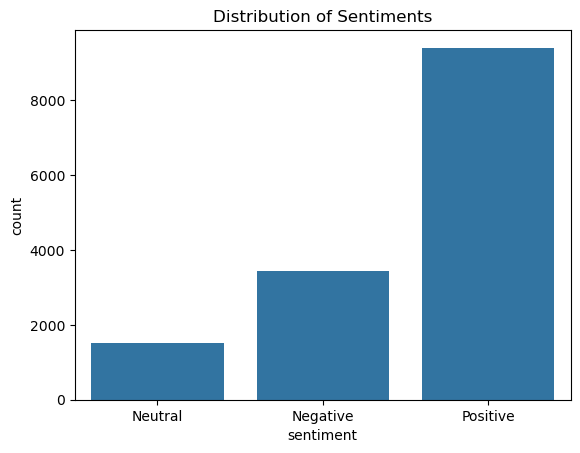

In [24]:
# Visualize the distribution of sentiments
sns.countplot(x='sentiment', data=df)
plt.title('Distribution of Sentiments')
plt.show()

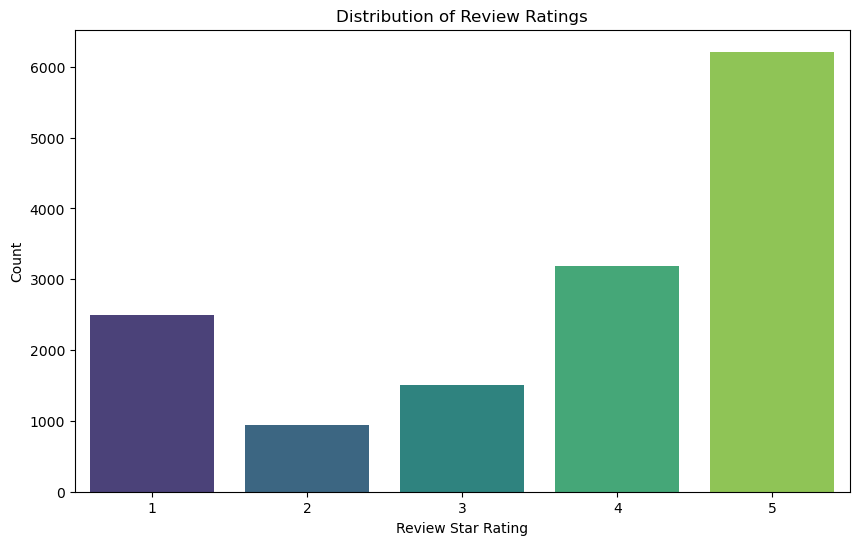

In [25]:
# Visualize the distribution of review ratings
plt.figure(figsize=(10, 6))
sns.countplot(x='ReviewStar', data=df, palette='viridis')
plt.title('Distribution of Review Ratings')
plt.xlabel('Review Star Rating')
plt.ylabel('Count')
plt.show()

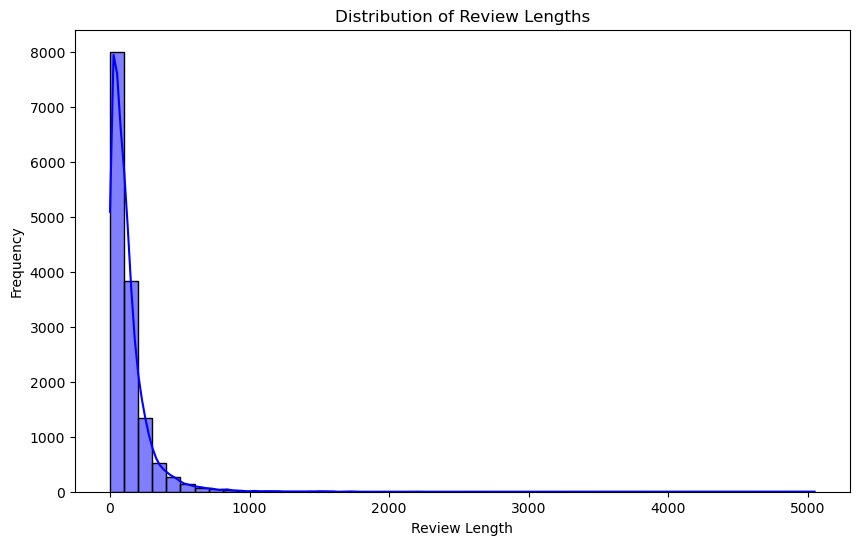

In [26]:
# Visualize the distribution of review lengths
df['ReviewLength'] = df['ReviewBody'].apply(len)
plt.figure(figsize=(10, 6))
sns.histplot(df['ReviewLength'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

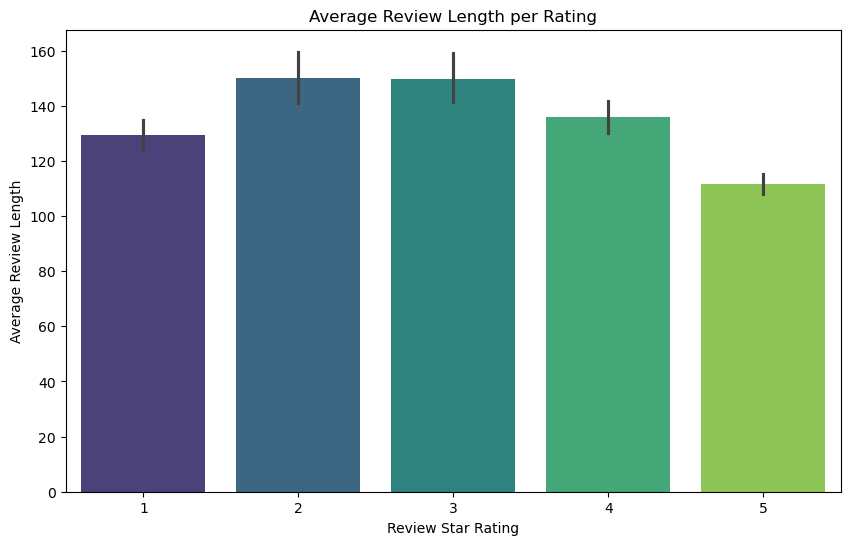

In [27]:
# Visualize the average review length per rating
plt.figure(figsize=(10, 6))
sns.barplot(x='ReviewStar', y='ReviewLength', data=df, palette='viridis')
plt.title('Average Review Length per Rating')
plt.xlabel('Review Star Rating')
plt.ylabel('Average Review Length')
plt.show()

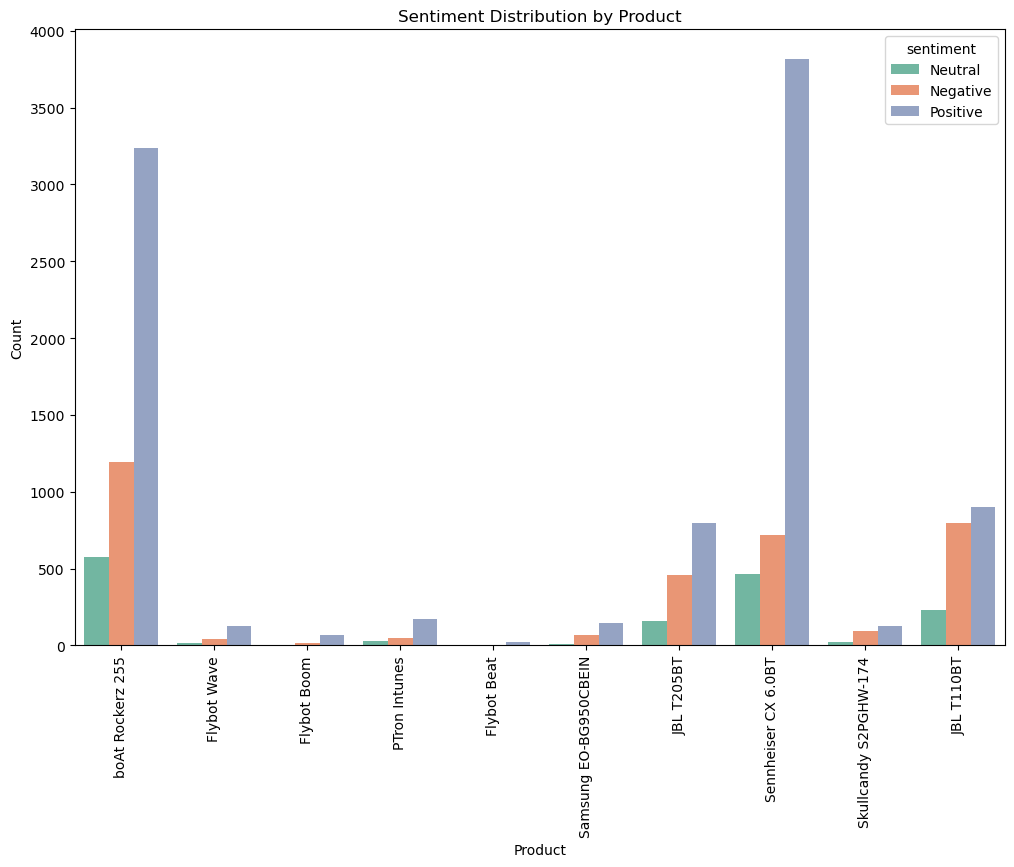

In [28]:
# Sentiment Distribution by Product
plt.figure(figsize=(12, 8))
sns.countplot(x='Product', hue='sentiment', data=df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Count')
plt.show()

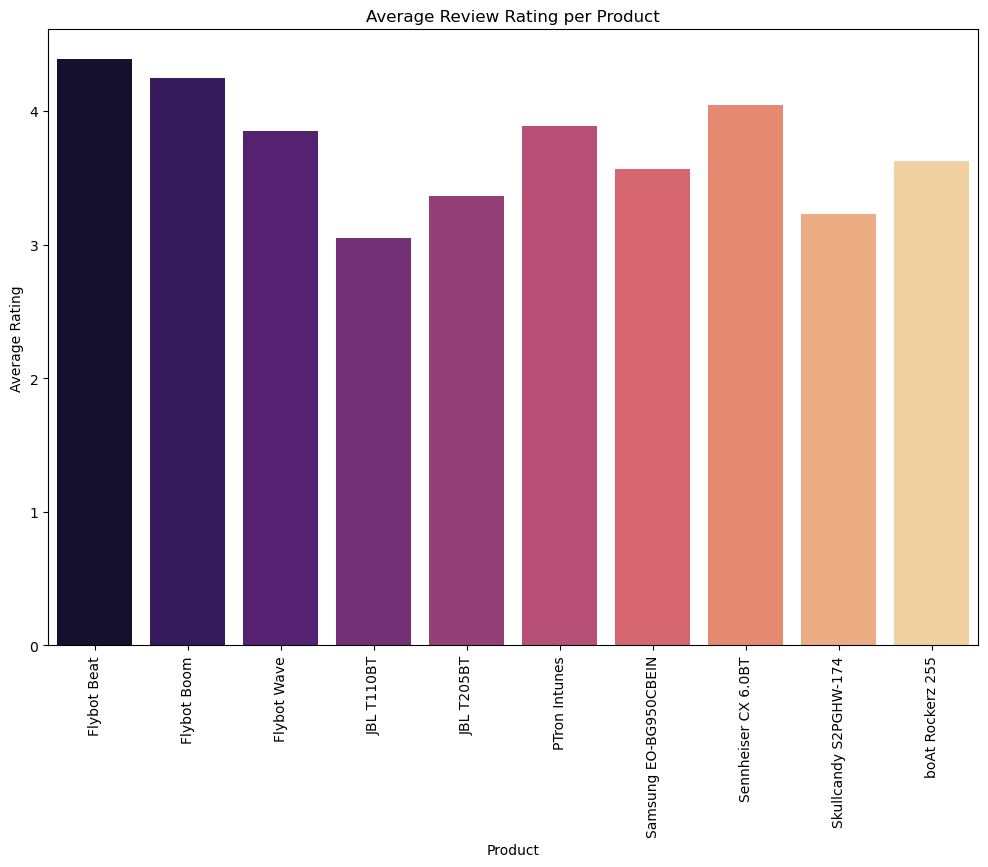

In [29]:
# Average Review Rating per Product
average_rating = df.groupby('Product')['ReviewStar'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='Product', y='ReviewStar', data=average_rating, palette='magma')
plt.xticks(rotation=90)
plt.title('Average Review Rating per Product')
plt.xlabel('Product')
plt.ylabel('Average Rating')
plt.show()

In [30]:
# Sampling (optional)
sample_size = 10000  # Adjust as needed
df_sample = df.sample(n=sample_size, random_state=42)

# TF-IDF Vectorization

In [32]:
# TF-IDF Vectorization on sampled data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_sample = vectorizer.fit_transform(df_sample['cleaned_text'])
y_sample = df_sample['sentiment']

In [33]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

# Importing ML Models

In [35]:
# Importing the LogisticRegression model from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# Importing the SVC (Support Vector Classifier) from sklearn.svm
from sklearn.svm import SVC

# Importing the MultinomialNB model from sklearn.naive_bayes
from sklearn.naive_bayes import MultinomialNB

# Importing the RandomForestClassifier and GradientBoostingClassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Importing the DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Importing the KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

In [36]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Classifier (Linear)': SVC(kernel='linear', probability=True),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

In [37]:
# Evaluate models
from sklearn.metrics import classification_report, accuracy_score
results = {}
for model_name, model in models.items():
    try:
        # Measure time for training and prediction
        import time
        start_time = time.time()
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        
        results[model_name] = {
            'Model': model,
            'Accuracy': accuracy,
            'Report': report
        }
        
        elapsed_time = time.time() - start_time
        print(f"{model_name} Accuracy: {accuracy}")
        print(f"Classification Report for {model_name}:")
        print(classification_report(y_test, y_pred))
        print(f"Time taken for {model_name}: {elapsed_time:.2f} seconds")
        print("------------------------------------------------------------------")
        
    except Exception as e:
        print(f"Error with {model_name}: {e}")

Logistic Regression Accuracy: 0.822
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Negative       0.79      0.77      0.78       452
     Neutral       0.62      0.15      0.24       226
    Positive       0.84      0.95      0.89      1322

    accuracy                           0.82      2000
   macro avg       0.75      0.62      0.64      2000
weighted avg       0.80      0.82      0.79      2000

Time taken for Logistic Regression: 0.28 seconds
------------------------------------------------------------------
Support Vector Classifier (Linear) Accuracy: 0.8215
Classification Report for Support Vector Classifier (Linear):
              precision    recall  f1-score   support

    Negative       0.77      0.79      0.78       452
     Neutral       0.57      0.17      0.26       226
    Positive       0.85      0.94      0.89      1322

    accuracy                           0.82      2000
   macro avg       0.73      0.63 

In [38]:
# Select the best model
best_model_name = max(results, key=lambda k: results[k]['Accuracy'])
best_model = results[best_model_name]['Model']
print(f"Best Model: {best_model_name}")

Best Model: Logistic Regression


In [39]:
# Additional Sentiment Analysis (using TextBlob and Text2Emotion)
from textblob import TextBlob
def get_fine_grained_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.5:
        return 'Very Positive'
    elif analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    elif analysis.sentiment.polarity > -0.5:
        return 'Negative'
    else:
        return 'Very Negative'

In [40]:
import text2emotion as te

def get_emotions(text):
    # Apply text2emotion to each text entry
    return te.get_emotion(text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\9903v\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\9903v\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\9903v\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [41]:
df['fine_grained_sentiment'] = df['cleaned_text'].apply(get_fine_grained_sentiment)

In [42]:
sample_size = 10000
df_sample = df.sample(n=sample_size, random_state=42)

start_time = time.time()
df_sample['emotions'] = df_sample['cleaned_text'].apply(get_emotions)
print(f"Time taken for sample: {time.time() - start_time} seconds")

Time taken for sample: 645.7729096412659 seconds


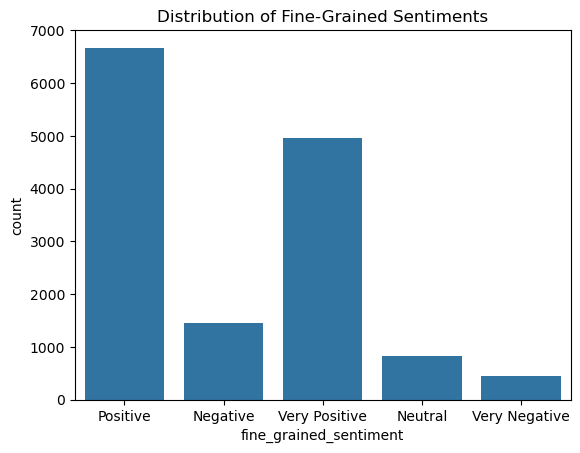

In [43]:
# Visualization of fine-grained sentiments
sns.countplot(x='fine_grained_sentiment', data=df)
plt.title('Distribution of Fine-Grained Sentiments')
plt.show()

In [44]:
# Example function to predict sentiment of an input text
def predict_sentiment(input_text):
    cleaned_input = preprocess_text(input_text)
    input_tfidf = vectorizer.transform([cleaned_input])
    sentiment = best_model.predict(input_tfidf)[0]
    
    # Calculate probabilities for positive, neutral, and negative
    probabilities = best_model.predict_proba(input_tfidf)[0]
    pos_prob = probabilities[best_model.classes_ == 'Positive'][0] * 100
    neu_prob = probabilities[best_model.classes_ == 'Neutral'][0] * 100
    neg_prob = probabilities[best_model.classes_ == 'Negative'][0] * 100
    
    return {
        'Sentiment': sentiment,
        'Positive Probability': pos_prob,
        'Neutral Probability': neu_prob,
        'Negative Probability': neg_prob
    }

# Real Time Usage

### 1. Probabilistic Sentiment Analysis

This approach provides a classification of the overall sentiment along with associated probabilities for multiple sentiment categories. It often includes probabilities for positive, neutral, and negative sentiments, giving a more detailed understanding of the sentiment expressed in the text. This type of analysis helps in understanding the confidence or likelihood of the sentiment being classified into each category.

In [47]:
# List of example inputs
example_inputs1 = [
    "The new update is fantastic but the app crashes frequently. 😍📉",
    "I had a great experience at the restaurant, but the wait time was too long. 🍽️😅",
    "The product quality is excellent, though it's a bit expensive. 🏆💸",
    "I didn't recommend this product to anyone, it is the worst product on the market. 😡🚫",
    "I am satisfied with the features, but the battery life is disappointing. 👍🔋"
]

In [48]:
# Loop through each input and get the sentiment prediction
for input_text in example_inputs1:
    prediction = predict_sentiment(input_text)
    print(f"Input: {input_text}\nSentiment: {prediction}\n")

Input: The new update is fantastic but the app crashes frequently. 😍📉
Sentiment: {'Sentiment': 'Positive', 'Positive Probability': 74.68318055599637, 'Neutral Probability': 11.340442506596347, 'Negative Probability': 13.976376937407272}

Input: I had a great experience at the restaurant, but the wait time was too long. 🍽️😅
Sentiment: {'Sentiment': 'Positive', 'Positive Probability': 89.66354885356718, 'Neutral Probability': 4.931028541293453, 'Negative Probability': 5.405422605139367}

Input: The product quality is excellent, though it's a bit expensive. 🏆💸
Sentiment: {'Sentiment': 'Positive', 'Positive Probability': 95.43649409781281, 'Neutral Probability': 2.2183740208616216, 'Negative Probability': 2.3451318813255813}

Input: I didn't recommend this product to anyone, it is the worst product on the market. 😡🚫
Sentiment: {'Sentiment': 'Negative', 'Positive Probability': 8.531392651157686, 'Neutral Probability': 1.3979136173494306, 'Negative Probability': 90.07069373149288}

Input: I 

### 2. Fine Grained Sentiment

This type of sentiment analysis provides a detailed classification of the overall sentiment in the text. It usually categorizes the sentiment into more nuanced labels such as "Very Positive," "Positive," "Neutral," "Negative," or "Very Negative." It focuses on capturing the intensity of the sentiment expressed.

In [50]:
example_inputs2 = [
    "The hotel was absolutely wonderful, with excellent service and beautiful rooms. 🌟🏨✨",
    "The food was okay, but I wouldn't go back for it. 🍽️🤷‍♂️",
    "I'm extremely disappointed with the product; it broke after just one use. 😠🔧",
    "The movie was quite enjoyable, though a bit long. 🎬😊⏳",
    "The new phone is amazing, but the battery life is just terrible. 📱😃🔋🚫"
]

In [51]:
# Loop through each input and get the sentiment prediction
for input_text in example_inputs2:
    prediction = get_fine_grained_sentiment(input_text)
    print(f"Input: {input_text}\nSentiment: {prediction}\n")

Input: The hotel was absolutely wonderful, with excellent service and beautiful rooms. 🌟🏨✨
Sentiment: Very Positive

Input: The food was okay, but I wouldn't go back for it. 🍽️🤷‍♂️
Sentiment: Positive

Input: I'm extremely disappointed with the product; it broke after just one use. 😠🔧
Sentiment: Very Negative

Input: The movie was quite enjoyable, though a bit long. 🎬😊⏳
Sentiment: Positive

Input: The new phone is amazing, but the battery life is just terrible. 📱😃🔋🚫
Sentiment: Negative



### 3. Emotion Detection

Emotion detection analyzes text to identify specific emotions conveyed. Instead of classifying the overall sentiment as positive or negative, it provides a distribution of different emotions present in the text. Each emotion is typically assigned a score or probability that represents its presence or intensity in the text.

In [53]:
example_inputs3 = [
    "The delivery was quick, but the product quality didn’t meet my expectations. 🚚⚠️",
    "Absolutely thrilled with my purchase—exceeded all my hopes! 🎉😊",
    "I’m disappointed; the item arrived damaged and was not what I ordered. 😞📦💔",
    "Customer support was very helpful, but the instructions were unclear and confusing. 💬👍🤔",
    "I am very very disappointed, this product is just a scam don't buy it. 😡🚫💔"
                  ]

In [54]:
# Loop through each input and get the sentiment prediction
for input_text in example_inputs3:
    prediction = get_emotions(input_text)
    print(f"Input: {input_text}\nSentiment: {prediction}\n")

Input: The delivery was quick, but the product quality didn’t meet my expectations. 🚚⚠️
Sentiment: {'Happy': 0.0, 'Angry': 0.5, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.5}

Input: Absolutely thrilled with my purchase—exceeded all my hopes! 🎉😊
Sentiment: {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.5, 'Sad': 0.0, 'Fear': 0.5}

Input: I’m disappointed; the item arrived damaged and was not what I ordered. 😞📦💔
Sentiment: {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}

Input: Customer support was very helpful, but the instructions were unclear and confusing. 💬👍🤔
Sentiment: {'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.67}

Input: I am very very disappointed, this product is just a scam don't buy it. 😡🚫💔
Sentiment: {'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 1.0, 'Fear': 0.0}

